In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
BINARY_DIRECTORY = '/Users/lamprinikourou/Documents/ThesisData/binary/'

# Binary - Algo SVM, NB, KNN

In [3]:
df_train_list = []
df_test_list = []
for csv_file in os.listdir(BINARY_DIRECTORY):
    d = pd.read_csv(BINARY_DIRECTORY+csv_file)
    df_train_list.append(d[:int(0.8*len(d) )])
    df_test_list.append(d[int(0.8*len(d) ):])
df_train = pd.concat(df_train_list).sample(frac=1)
df_test = pd.concat(df_test_list).sample(frac=1)
del df_train_list
del df_test_list

In [4]:
len(df_train), len(df_test)

(1126572, 281647)

In [5]:
X_columns = [c for c in df_train.columns if c not in ['label', 'category', 'specific_class']]
y_column_label = 'label'
y_column_category = 'category'
y_column_specific_class = 'specific_class'

In [6]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [7]:
SVM2 = SVC()
SVM3 = SVC()
SVM6 = SVC()

NB2 = GaussianNB()
NB3 = GaussianNB()
NB6 = GaussianNB()

KNN2 = KNeighborsClassifier()
KNN3 = KNeighborsClassifier()
KNN6 = KNeighborsClassifier()

In [8]:
%time SVM2.fit(df_train[X_columns], df_train[y_column_label])
%time SVM3.fit(df_train[X_columns], df_train[y_column_category])
%time SVM6.fit(df_train[X_columns], df_train[y_column_specific_class])


%time NB2.fit(df_train[X_columns], df_train[y_column_label])
%time NB3.fit(df_train[X_columns], df_train[y_column_category])
%time NB6.fit(df_train[X_columns], df_train[y_column_specific_class])

%time KNN2.fit(df_train[X_columns], df_train[y_column_label])
%time KNN3.fit(df_train[X_columns], df_train[y_column_category])
%time KNN6.fit(df_train[X_columns], df_train[y_column_specific_class])

CPU times: user 55.9 s, sys: 6.08 s, total: 1min 2s
Wall time: 1min 4s
CPU times: user 45 s, sys: 3.24 s, total: 48.2 s
Wall time: 49.1 s
CPU times: user 44.2 s, sys: 10.9 s, total: 55.1 s
Wall time: 1min
CPU times: user 1.94 s, sys: 2.26 s, total: 4.19 s
Wall time: 5.3 s
CPU times: user 1.94 s, sys: 1.87 s, total: 3.82 s
Wall time: 4.64 s
CPU times: user 1.95 s, sys: 1.86 s, total: 3.81 s
Wall time: 4.51 s
CPU times: user 1.08 s, sys: 451 ms, total: 1.53 s
Wall time: 1.75 s
CPU times: user 1.07 s, sys: 446 ms, total: 1.51 s
Wall time: 1.77 s
CPU times: user 1.07 s, sys: 445 ms, total: 1.52 s
Wall time: 1.77 s


KNeighborsClassifier()

In [18]:
pred_SVM2 = SVM2.predict(df_test[X_columns])
pred_SVM3 = SVM3.predict(df_test[X_columns])
pred_SVM6 = SVM6.predict(df_test[X_columns])

pred_NB2 = NB2.predict(df_test[X_columns])
pred_NB3 = NB3.predict(df_test[X_columns])
pred_NB6 = NB6.predict(df_test[X_columns])

pred_KNN2 = KNN2.predict(df_test[X_columns])
pred_KNN3 = KNN3.predict(df_test[X_columns])
pred_KNN6 = KNN6.predict(df_test[X_columns])

In [10]:
SVM2_acc = accuracy_score(df_test[y_column_label], pred_SVM2)
SVM2_rcc = recall_score(df_test[y_column_label], pred_SVM2, average='macro')
SVM2_pre = precision_score(df_test[y_column_label], pred_SVM2, average='macro')
SVM2_f1 = f1_score(df_test[y_column_label], pred_SVM2, average='macro')

SVM3_acc = accuracy_score(df_test[y_column_category], pred_SVM3)
SVM3_rcc = recall_score(df_test[y_column_category], pred_SVM3, average='macro')
SVM3_pre = precision_score(df_test[y_column_category], pred_SVM3, average='macro')
SVM3_f1 = f1_score(df_test[y_column_category], pred_SVM3, average='macro')

SVM6_acc = accuracy_score(df_test[y_column_specific_class], pred_SVM6)
SVM6_rcc = recall_score(df_test[y_column_specific_class], pred_SVM6, average='macro')
SVM6_pre = precision_score(df_test[y_column_specific_class], pred_SVM6, average='macro')
SVM6_f1 = f1_score(df_test[y_column_specific_class], pred_SVM6, average='macro')

In [11]:
NB2_acc = accuracy_score(df_test[y_column_label], pred_NB2)
NB2_rcc = recall_score(df_test[y_column_label], pred_NB2, average='macro')
NB2_pre = precision_score(df_test[y_column_label], pred_NB2, average='macro')
NB2_f1 = f1_score(df_test[y_column_label], pred_NB2, average='macro')

NB3_acc = accuracy_score(df_test[y_column_category], pred_NB3)
NB3_rcc = recall_score(df_test[y_column_category], pred_NB3, average='macro')
NB3_pre = precision_score(df_test[y_column_category], pred_NB3, average='macro')
NB3_f1 = f1_score(df_test[y_column_category], pred_NB3, average='macro')

NB6_acc = accuracy_score(df_test[y_column_specific_class], pred_NB6)
NB6_rcc = recall_score(df_test[y_column_specific_class], pred_NB6, average='macro')
NB6_pre = precision_score(df_test[y_column_specific_class], pred_NB6, average='macro')
NB6_f1 = f1_score(df_test[y_column_specific_class], pred_NB6, average='macro')

In [12]:
KNN2_acc = accuracy_score(df_test[y_column_label], pred_KNN2)
KNN2_rcc = recall_score(df_test[y_column_label], pred_KNN2, average='macro')
KNN2_pre = precision_score(df_test[y_column_label], pred_KNN2, average='macro')
KNN2_f1 = f1_score(df_test[y_column_label], pred_KNN2, average='macro')

KNN3_acc = accuracy_score(df_test[y_column_category], pred_KNN3)
KNN3_rcc = recall_score(df_test[y_column_category], pred_KNN3, average='macro')
KNN3_pre = precision_score(df_test[y_column_category], pred_KNN3, average='macro')
KNN3_f1 = f1_score(df_test[y_column_category], pred_KNN3, average='macro')

KNN6_acc = accuracy_score(df_test[y_column_specific_class], pred_KNN6)
KNN6_rcc = recall_score(df_test[y_column_specific_class], pred_KNN6, average='macro')
KNN6_pre = precision_score(df_test[y_column_specific_class], pred_KNN6, average='macro')
KNN6_f1 = f1_score(df_test[y_column_specific_class], pred_KNN6, average='macro')

In [13]:
print('##### KNN #####')
print('2')
print('accuracy = ', KNN2_acc)
print('recall = ', KNN2_rcc)
print('precision = ', KNN2_pre)
print('F1_score = ', KNN2_f1)
print()

print('3')
print('##### KNN #####')
print('accuracy = ', KNN3_acc)
print('recall = ', KNN3_rcc)
print('precision = ', KNN3_pre)
print('F1_score = ', KNN3_f1)
print()

print('6')
print('##### KNN #####')
print('accuracy = ', KNN6_acc)
print('recall = ', KNN6_rcc)
print('precision = ', KNN6_pre)
print('F1_score = ', KNN6_f1)


##### KNN #####
2
accuracy =  1.0
recall =  1.0
precision =  1.0
F1_score =  1.0

3
##### KNN #####
accuracy =  1.0
recall =  1.0
precision =  1.0
F1_score =  1.0

6
##### KNN #####
accuracy =  0.9468341576512442
recall =  0.6818366715217933
precision =  0.7143695310835186
F1_score =  0.6018580535324812


In [14]:
print('##### SVM #####')
print('2')
print('accuracy = ', SVM2_acc)
print('recall = ', SVM2_rcc)
print('precision = ', SVM2_pre)
print('F1_score = ', SVM2_f1)
print()
print('3')
print('##### SVM #####')
print('accuracy = ', SVM3_acc)
print('recall = ', SVM3_rcc)
print('precision = ', SVM3_pre)
print('F1_score = ', SVM3_f1)
print()
print('6')
print('##### SVM #####')
print('accuracy = ', SVM6_acc)
print('recall = ', SVM6_rcc)
print('precision = ', SVM6_pre)
print('F1_score = ', SVM6_f1)

##### SVM #####
2
accuracy =  0.9822650338899402
recall =  0.932315238895363
precision =  0.9899997197118637
F1_score =  0.9586500626847172

3
##### SVM #####
accuracy =  0.982268584433706
recall =  0.9242162129351422
precision =  0.9933344544903674
F1_score =  0.9538818436280833

6
##### SVM #####
accuracy =  0.9468341576512442
recall =  0.6818366715217933
precision =  0.8268671360067792
F1_score =  0.6910982519348726


In [15]:
cm_SVM = confusion_matrix(df_test[y_column_specific_class], pred_SVM6, labels=['BENIGN', 'DoS', 'STEERING_WHEEL', 'SPEED', 'RPM', 'GAS'])
cm_SVM = pd.DataFrame(cm_SVM, columns = ['BENIGN', 'DoS', 'SW', 'SPEED', 'RPM', 'GAS'])
cm_SVM.index = cm_SVM.columns
cm_SVM.to_csv('/Users/lamprinikourou/cm_SVM_bin.csv')
cm_SVM

,BENIGN,DoS,SW,SPEED,RPM,GAS
BENIGN,244748,0,0,0,0,0
DoS,0,14933,0,0,0,0
SW,0,0,3996,0,0,0
SPEED,4989,0,0,2,0,0
RPM,4996,0,0,4989,995,0
GAS,0,0,0,0,0,1999


In [16]:
cm_NB = confusion_matrix(df_test[y_column_specific_class], pred_NB6, labels=['BENIGN', 'DoS', 'STEERING_WHEEL', 'SPEED', 'RPM', 'GAS'])
cm_NB = pd.DataFrame(cm_NB, columns = ['BENIGN', 'DoS', 'SW', 'SPEED', 'RPM', 'GAS'])
cm_NB.index = cm_NB.columns
cm_NB.to_csv('/Users/lamprinikourou/cm_NB_bin.csv')
cm_NB

,BENIGN,DoS,SW,SPEED,RPM,GAS
BENIGN,244748,0,0,0,0,0
DoS,0,14933,0,0,0,0
SW,1,0,3995,0,0,0
SPEED,4989,0,0,2,0,0
RPM,9985,0,0,0,995,0
GAS,0,0,0,0,0,1999


In [17]:
cm_KNN = confusion_matrix(df_test[y_column_specific_class], pred_KNN6, labels=['BENIGN', 'DoS', 'STEERING_WHEEL', 'SPEED', 'RPM', 'GAS'])
cm_KNN = pd.DataFrame(cm_KNN, columns = ['BENIGN', 'DoS', 'SW', 'SPEED', 'RPM', 'GAS'])
cm_KNN.index = cm_KNN.columns
cm_KNN.to_csv('/Users/lamprinikourou/cm_KNN.csv')
cm_KNN

,BENIGN,DoS,SW,SPEED,RPM,GAS
BENIGN,244748,0,0,0,0,0
DoS,0,14933,0,0,0,0
SW,0,0,3996,0,0,0
SPEED,0,0,4989,2,0,0
RPM,0,0,4996,4989,995,0
GAS,0,0,0,0,0,1999


# xgboost - encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

label_encoder_label = LabelEncoder()
label_encoder_category = LabelEncoder()
label_encoder_specific_class = LabelEncoder()

'''
label_encoder_label.fit(['BENIGN', 'ATTACK'])
label_encoder_category.fit(['BENIGN', 'DoS', 'SPOOFING'])
label_encoder_specific_class.fit(['BENIGN', 'DoS', 'GAS', 'RPM', 'SPEED', 'STEERING_WHEEL'])
'''

df_train[y_column_label] = label_encoder_label.fit_transform(df_train[y_column_label])
df_train[y_column_category] = label_encoder_category.fit_transform(df_train[y_column_category])
df_train[y_column_specific_class] = label_encoder_specific_class.fit_transform(df_train[y_column_specific_class])

df_test[y_column_label] = label_encoder_label.transform(df_test[y_column_label])
df_test[y_column_category] = label_encoder_category.transform(df_test[y_column_category])
df_test[y_column_specific_class] = label_encoder_specific_class.transform(df_test[y_column_specific_class])

print("Label encoding for 'label':")
print(dict(zip(label_encoder_label.classes_, label_encoder_label.transform(label_encoder_label.classes_))))
print()
print("Label encoding for 'category':")
print(dict(zip(label_encoder_category.classes_, label_encoder_category.transform(label_encoder_category.classes_))))
print()
print("Label encoding for 'specific_class':")
print(dict(zip(label_encoder_specific_class.classes_, label_encoder_specific_class.transform(label_encoder_specific_class.classes_))))
print()

XGB2 = XGBClassifier()
XGB3 = XGBClassifier()
XGB6 = XGBClassifier()

%time XGB2.fit(df_train[X_columns], df_train[y_column_label])
%time XGB3.fit(df_train[X_columns], df_train[y_column_category])
%time XGB6.fit(df_train[X_columns], df_train[y_column_specific_class])

pred_XGB2 = XGB2.predict(df_test[X_columns])
pred_XGB3 = XGB3.predict(df_test[X_columns])
pred_XGB6 = XGB6.predict(df_test[X_columns])

XGB2_acc = accuracy_score(df_test[y_column_label], pred_XGB2)
XGB2_rcc = recall_score(df_test[y_column_label], pred_XGB2, average='macro')
XGB2_pre = precision_score(df_test[y_column_label], pred_XGB2, average='macro')
XGB2_f1 = f1_score(df_test[y_column_label], pred_XGB2, average='macro')

XGB3_acc = accuracy_score(df_test[y_column_category], pred_XGB3)
XGB3_rcc = recall_score(df_test[y_column_category], pred_XGB3, average='macro')
XGB3_pre = precision_score(df_test[y_column_category], pred_XGB3, average='macro')
XGB3_f1 = f1_score(df_test[y_column_category], pred_XGB3, average='macro')

XGB6_acc = accuracy_score(df_test[y_column_specific_class], pred_XGB6)
XGB6_rcc = recall_score(df_test[y_column_specific_class], pred_XGB6, average='macro')
XGB6_pre = precision_score(df_test[y_column_specific_class], pred_XGB6, average='macro')
XGB6_f1 = f1_score(df_test[y_column_specific_class], pred_XGB6, average='macro')

print('##### XGBoost #####')
print('2')
print('accuracy = ', XGB2_acc)
print('recall = ', XGB2_rcc)
print('precision = ', XGB2_pre)
print('F1_score = ', XGB2_f1)
print()

print('3')
print('##### XGBoost #####')
print('accuracy = ', XGB3_acc)
print('recall = ', XGB3_rcc)
print('precision = ', XGB3_pre)
print('F1_score = ', XGB3_f1)
print()

print('6')
print('##### XGBoost #####')
print('accuracy = ', XGB6_acc)
print('recall = ', XGB6_rcc)
print('precision = ', XGB6_pre)
print('F1_score = ', XGB6_f1)

Label encoding for 'label':
{'ATTACK': 0, 'BENIGN': 1}

Label encoding for 'category':
{'BENIGN': 0, 'DoS': 1, 'SPOOFING': 2}

Label encoding for 'specific_class':
{'BENIGN': 0, 'DoS': 1, 'GAS': 2, 'RPM': 3, 'SPEED': 4, 'STEERING_WHEEL': 5}

CPU times: user 38.9 s, sys: 6 s, total: 44.9 s
Wall time: 7.7 s
CPU times: user 1min 37s, sys: 12.8 s, total: 1min 50s
Wall time: 16.4 s
CPU times: user 2min 44s, sys: 20 s, total: 3min 4s
Wall time: 27.1 s
##### XGBoost #####
2
accuracy =  0.982268584433706
recall =  0.9323287893980867
precision =  0.990001681735551
F1_score =  0.9586588582082931

3
##### XGBoost #####
accuracy =  0.982268584433706
recall =  0.9242162129351422
precision =  0.9933344544903674
F1_score =  0.9538818436280833

6
##### XGBoost #####
accuracy =  0.982268584433706
recall =  0.8333242246486906
precision =  0.9966672272451836
F1_score =  0.8317456814652885


In [35]:
labels_specific_class_encoded = label_encoder_specific_class.transform(['BENIGN', 'DoS', 'STEERING_WHEEL', 'SPEED', 'RPM', 'GAS'])
cm_XGB = confusion_matrix(df_test[y_column_specific_class], pred_XGB6, labels=labels_specific_class_encoded)

cm_labels = ['BENIGN', 'DoS', 'SW', 'SPEED', 'RPM', 'GAS']
cm_XGB_df = pd.DataFrame(cm_XGB, columns=cm_labels, index=cm_labels)
cm_XGB_df.to_csv('/Users/lamprinikourou/cm_XGB.csv')
cm_XGB_df

        BENIGN    DoS    SW  SPEED    RPM   GAS
BENIGN  244748      0     0      0      0     0
DoS          0  14933     0      0      0     0
SW           0      0  3996      0      0     0
SPEED     4989      0     0      2      0     0
RPM          5      0     0      0  10975     0
GAS          0      0     0      0      0  1999


In [18]:
color_svm = 'lightgray'
color_nb = 'rosybrown'
color_xgb = 'royalblue'

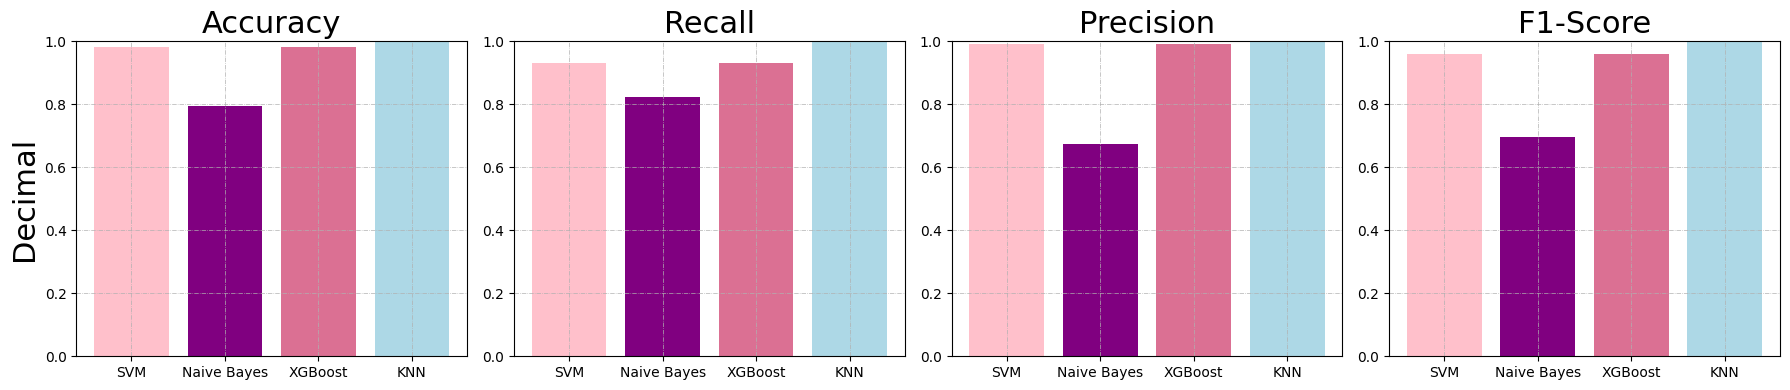

In [42]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Updated color palette
color_svm = 'pink'
color_nb = 'purple'
color_xgb = 'palevioletred' 
color_knn = 'lightblue'  

fig, axs = plt.subplots(1, 4, figsize=(18, 4))

# Accuracy
axs[0].bar(['SVM', 'Naive Bayes', 'XGBoost', 'KNN'], [SVM2_acc, NB2_acc, XGB2_acc, KNN2_acc], color=[color_svm, color_nb, color_xgb, color_knn])
axs[0].set_title("Accuracy", fontsize=22)
axs[0].set_ylabel("Decimal", fontsize=22)
axs[0].set_ylim(0, 1)

# Recall
axs[1].bar(['SVM', 'Naive Bayes', 'XGBoost', 'KNN'], [SVM2_rcc, NB2_rcc, XGB2_rcc, KNN2_rcc], color=[color_svm, color_nb, color_xgb, color_knn])
axs[1].set_title("Recall", fontsize=22)
axs[1].set_ylim(0, 1)

# Precision
axs[2].bar(['SVM', 'Naive Bayes', 'XGBoost', 'KNN'], [SVM2_pre, NB2_pre, XGB2_pre, KNN2_pre], color=[color_svm, color_nb, color_xgb, color_knn])
axs[2].set_title("Precision", fontsize=22)
axs[2].set_ylim(0, 1)

# F1-Score
axs[3].bar(['SVM', 'Naive Bayes', 'XGBoost', 'KNN'], [SVM2_f1, NB2_f1, XGB2_f1, KNN2_f1], color=[color_svm, color_nb, color_xgb, color_knn])
axs[3].set_title("F1-Score", fontsize=22)
axs[3].set_ylim(0, 1)

# Create the legend
legend_elements = [Patch(facecolor=color_svm, label='SVM'),
                   Patch(facecolor=color_nb, label='Naive Bayes'),
                   Patch(facecolor=color_xgb, label='XGBoost'),
                   Patch(facecolor=color_knn, label='KNN')]  

plt.tight_layout()

# Save the figure
plt.savefig('/Users/lamprinikourou/Downloads/bin_plot.png', bbox_inches='tight')

plt.show()

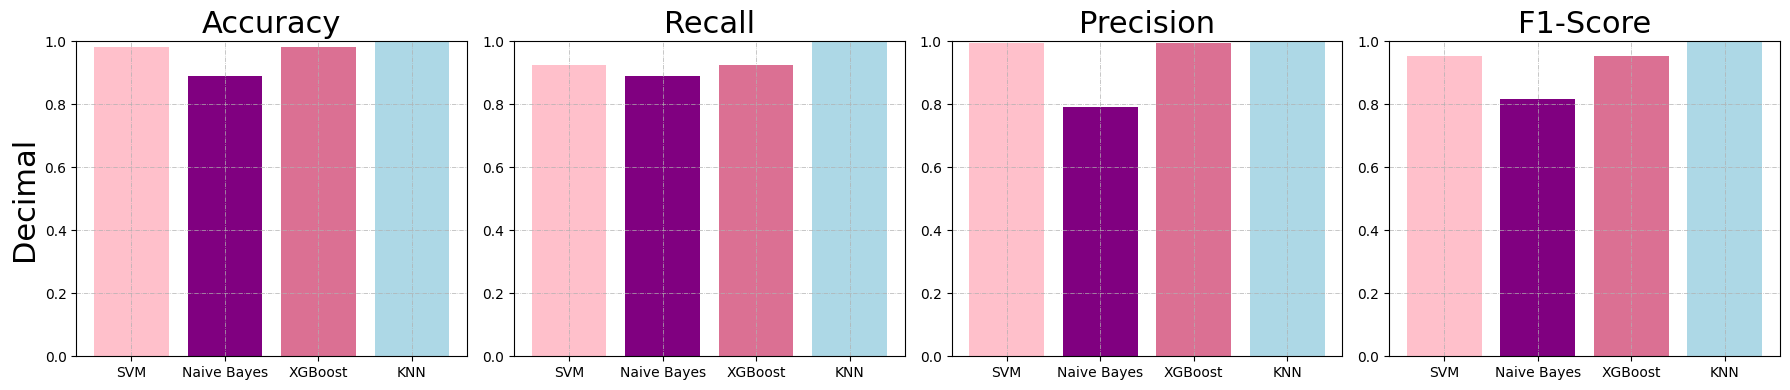

In [43]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Updated color palette
color_svm = 'pink'
color_nb = 'purple'
color_xgb = 'palevioletred' 
color_knn = 'lightblue'  

fig, axs = plt.subplots(1, 4, figsize=(18, 4))

# Accuracy
axs[0].bar(['SVM', 'Naive Bayes', 'XGBoost', 'KNN'], [SVM3_acc, NB3_acc, XGB3_acc, KNN3_acc], color=[color_svm, color_nb, color_xgb, color_knn])
axs[0].set_title("Accuracy", fontsize=22)
axs[0].set_ylabel("Decimal", fontsize=22)
axs[0].set_ylim(0, 1)

# Recall
axs[1].bar(['SVM', 'Naive Bayes', 'XGBoost', 'KNN'], [SVM3_rcc, NB3_rcc, XGB3_rcc, KNN3_rcc], color=[color_svm, color_nb, color_xgb, color_knn])
axs[1].set_title("Recall", fontsize=22)
axs[1].set_ylim(0, 1)

# Precision
axs[2].bar(['SVM', 'Naive Bayes', 'XGBoost', 'KNN'], [SVM3_pre, NB3_pre, XGB3_pre, KNN3_pre], color=[color_svm, color_nb, color_xgb, color_knn])
axs[2].set_title("Precision", fontsize=22)
axs[2].set_ylim(0, 1)

# F1-Score
axs[3].bar(['SVM', 'Naive Bayes', 'XGBoost', 'KNN'], [SVM3_f1, NB3_f1, XGB3_f1, KNN3_f1], color=[color_svm, color_nb, color_xgb, color_knn])
axs[3].set_title("F1-Score", fontsize=22)
axs[3].set_ylim(0, 1)

# Create the legend
legend_elements = [Patch(facecolor=color_svm, label='SVM'),
                   Patch(facecolor=color_nb, label='Naive Bayes'),
                   Patch(facecolor=color_xgb, label='XGBoost'),
                   Patch(facecolor=color_knn, label='KNN')]  


plt.tight_layout()

# Save the figure
plt.savefig('/Users/lamprinikourou/Downloads/bin_plot2.png', bbox_inches='tight')

plt.show()


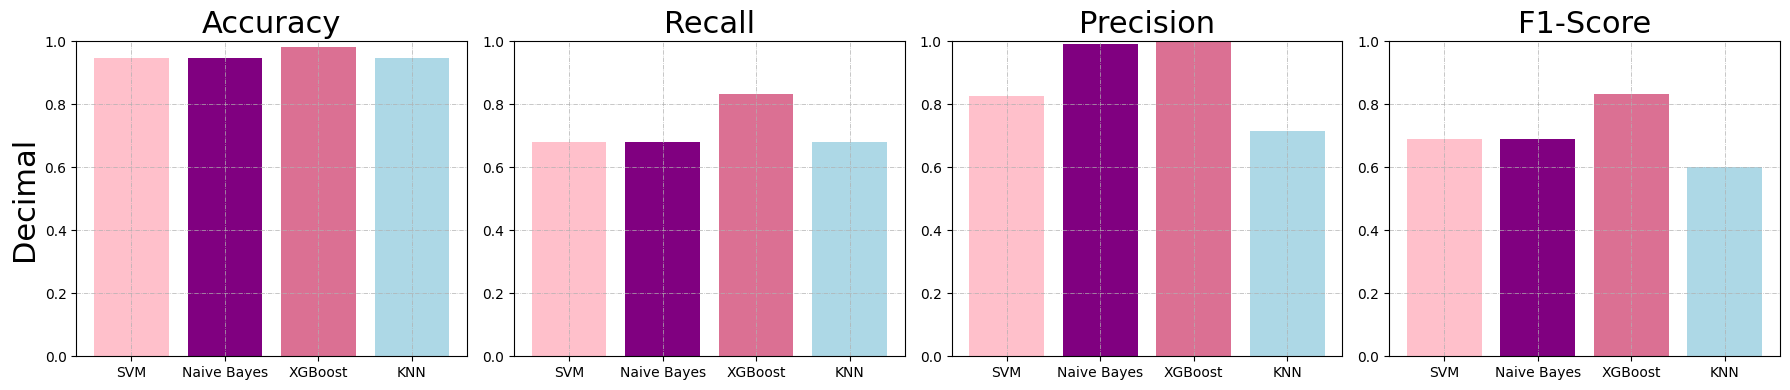

In [44]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Updated color palette
color_svm = 'pink'
color_nb = 'purple'
color_xgb = 'palevioletred' 
color_knn = 'lightblue'  

fig, axs = plt.subplots(1, 4, figsize=(18, 4))

# Accuracy
axs[0].bar(['SVM', 'Naive Bayes', 'XGBoost', 'KNN'], [SVM6_acc, NB6_acc, XGB6_acc, KNN6_acc], color=[color_svm, color_nb, color_xgb, color_knn])
axs[0].set_title("Accuracy", fontsize=22)
axs[0].set_ylabel("Decimal", fontsize=22)
axs[0].set_ylim(0, 1)

# Recall
axs[1].bar(['SVM', 'Naive Bayes', 'XGBoost', 'KNN'], [SVM6_rcc, NB6_rcc, XGB6_rcc, KNN6_rcc], color=[color_svm, color_nb, color_xgb, color_knn])
axs[1].set_title("Recall", fontsize=22)
axs[1].set_ylim(0, 1)

# Precision
axs[2].bar(['SVM', 'Naive Bayes', 'XGBoost', 'KNN'], [SVM6_pre, NB6_pre, XGB6_pre, KNN6_pre], color=[color_svm, color_nb, color_xgb, color_knn])
axs[2].set_title("Precision", fontsize=22)
axs[2].set_ylim(0, 1)

# F1-Score
axs[3].bar(['SVM', 'Naive Bayes', 'XGBoost', 'KNN'], [SVM6_f1, NB6_f1, XGB6_f1, KNN6_f1], color=[color_svm, color_nb, color_xgb, color_knn])
axs[3].set_title("F1-Score", fontsize=22)
axs[3].set_ylim(0, 1)

# Create the legend
legend_elements = [Patch(facecolor=color_svm, label='SVM'),
                   Patch(facecolor=color_nb, label='Naive Bayes'),
                   Patch(facecolor=color_xgb, label='XGBoost'),
                   Patch(facecolor=color_knn, label='KNN')]  # Added legend for KNN

plt.tight_layout()

# Save the figure
plt.savefig('/Users/lamprinikourou/Downloads/bin_plot3.png', bbox_inches='tight')

plt.show()


In [7]:
df_train['specific_class'].value_counts()

specific_class
BENIGN            978989
DoS                59730
RPM                43920
SPEED              19960
STEERING_WHEEL     15981
GAS                 7992
Name: count, dtype: int64

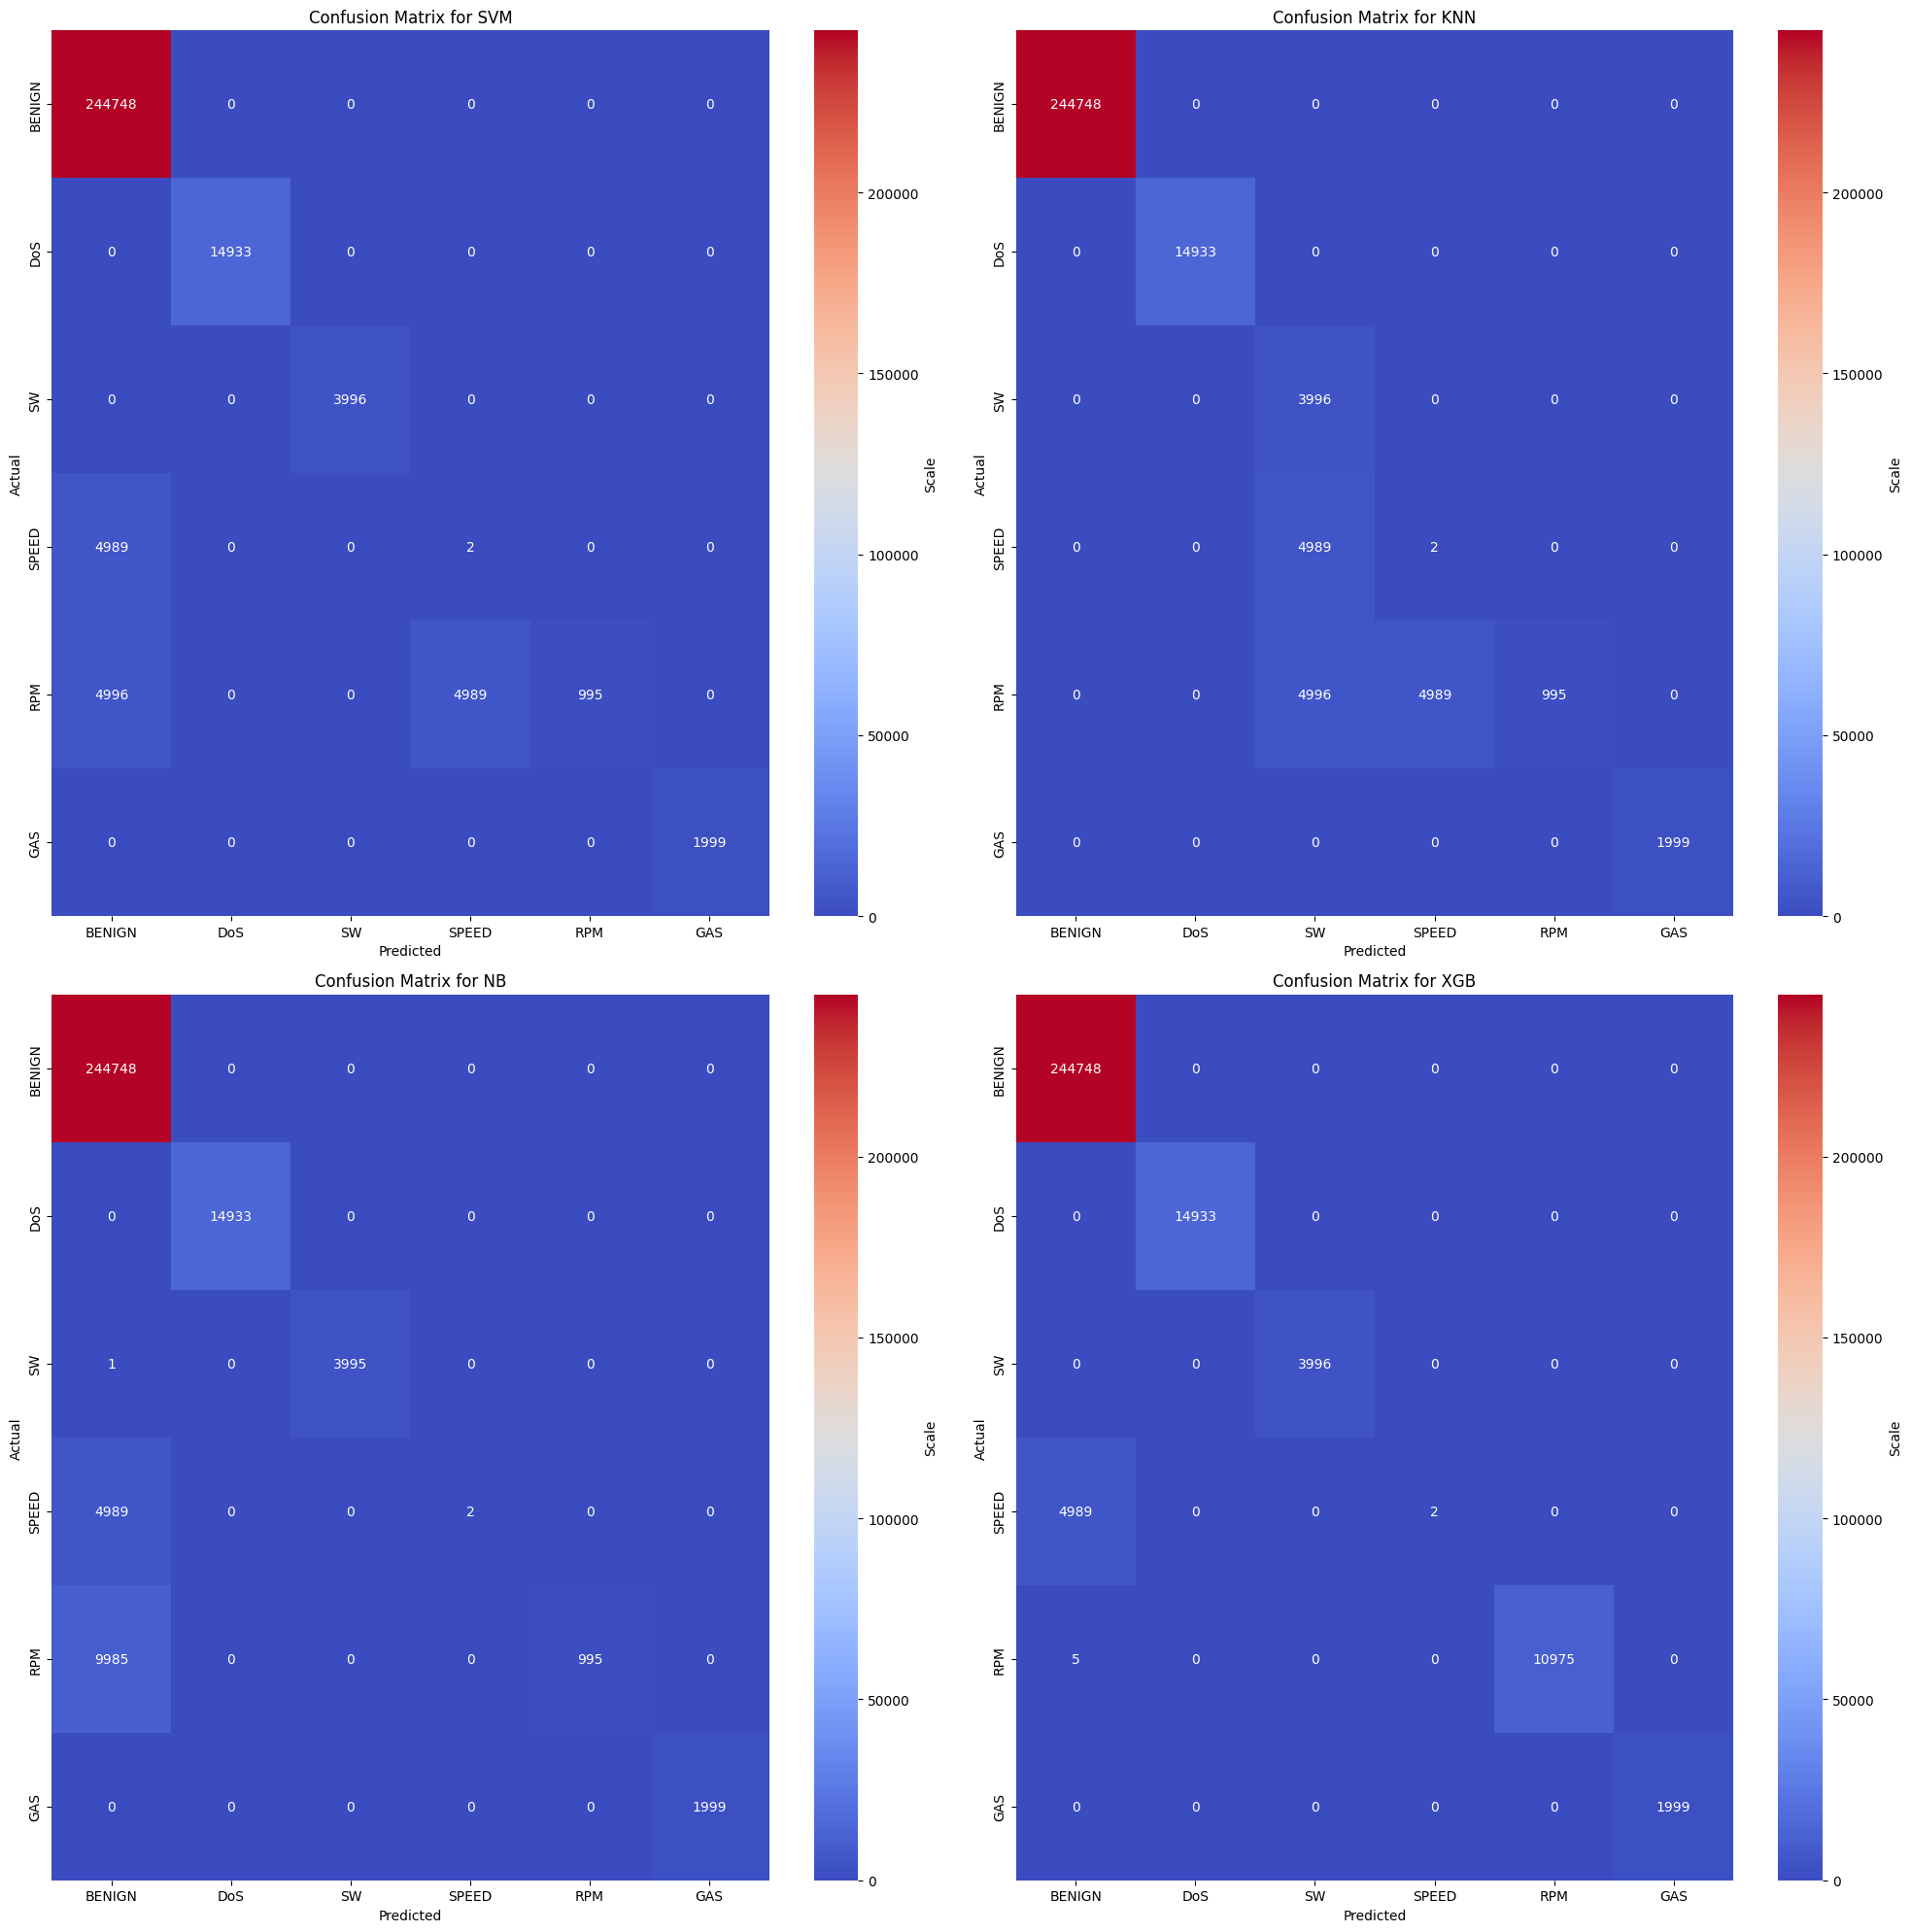

In [41]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

CSV_DIRECTORY = '/Users/lamprinikourou/'

algorithms = ['SVM', 'KNN', 'NB', 'XGB']

confusion_matrices = {}

for algorithm in algorithms:
    file_path = os.path.join(CSV_DIRECTORY, f'cm_{algorithm}.csv')
    confusion_matrices[algorithm] = pd.read_csv(file_path, index_col=0)


labels = ['BENIGN', 'DoS', 'SW', 'SPEED', 'RPM', 'GAS']

for algorithm in algorithms:
    plt.figure(figsize=(10, 10))
    cm = confusion_matrices[algorithm].values
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=labels, yticklabels=labels, cbar_kws={'label': 'Scale'})
    plt.title(f'Confusion Matrix for {algorithm}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    output_path = f'/Users/lamprinikourou/Documents/confusion_matrix_{algorithm}.png'
    plt.savefig(output_path)
    plt.close()